# Joint Program Summer Math Review: Probability and Statistics 
Brynnydd Hamilton

This notebook is intended to accompany the PDF document "stats.pdf". It utilizes very few Julia packages, and should run out of the box. 

In [1]:
using Random, PyPlot

# Bayes Rule Example: False alarm 
Imagine we have a piece of equipment that detects whales. We know that for our region of study, there are whales there 5% of the time. Furthermore, our equipment will detect the whale 99% of the time **if there is a whale there**. It will detect a whale 10% of the time **if there is no whale there**.

If we get a detection signal, what's the probability that it's actually a whale? 

In [2]:
#lets make a function to simulate this situation! 
function was_there_a_whale()
    answers = Array{Bool}(undef, 2) #array of length 2 of type Boolean for output 
    if rand() < 0.95
        answers[1] = false #no whale
        if rand() < 0.9 
            answers[2] = false #there was no whale, and we didn't detect a whale! 
        else
            answers[2] = true #there was no whale, but we detected a whale! false alarm! 
        end
        
    else 
        answers[1] = true #whale 
        if rand() < 0.99
            answers[2] = true #there was a whale, and we detected it! 
        else 
            answers[2] = false #there was a whale, and we missed it!          
        end
    end
    return answers
end

was_there_a_whale (generic function with 1 method)

In [3]:
#now lets run this function a large number of times, and keep track of every output case
N = 100000000 #number of times to run
whale_detected = 0 #there was a whale, and we detected it
whale_notdetected = 0 #there was a whale, and we did not detect it (false negative)
nowhale_detected = 0 #there was no whale, but we detected a whale (false positive)
nowhale_notdetected = 0 #there was no whale, and we detected no whale 

for i ∈ 1:N 
    answer = was_there_a_whale()
    if answer == [0, 0] 
        nowhale_notdetected += 1 
    elseif answer == [1,1]
        whale_detected += 1
    elseif answer == [0,1]
        nowhale_detected += 1
    elseif answer == [1,0]
        whale_notdetected += 1
    end
    
end

#show the number of times each event occurred 
@show whale_detected
@show whale_notdetected
@show nowhale_detected
@show nowhale_notdetected

whale_detected = 4955122
whale_notdetected = 49590
nowhale_detected = 9497753
nowhale_notdetected = 85497535


85497535

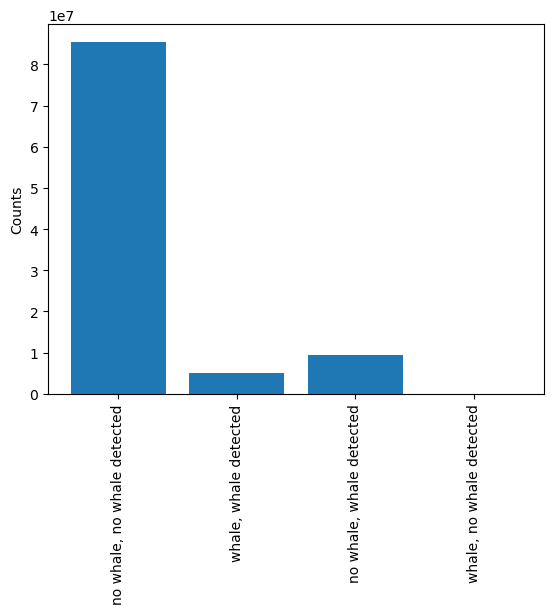

([0, 1, 2, 3], PyCall.PyObject[PyObject Text(0, 0, 'no whale, no whale detected'), PyObject Text(1, 0, 'whale, whale detected'), PyObject Text(2, 0, 'no whale, whale detected'), PyObject Text(3, 0, 'whale, no whale detected')])

In [4]:
#make a plot of the number of times each event occurred 
bar(x = ["no whale, no whale detected","whale, whale detected", "no whale, whale detected", "whale, no whale detected"], height = [nowhale_notdetected, whale_detected, nowhale_detected, whale_notdetected])
ylabel("Counts") 
xticks(rotation = 90)

So what's the probability that there was a whale given that there was a detection? One way to calculate this would be to divide the number of times that there was a detected whale by the sum of the number of times that there was a detection. 

In [5]:
whale_detected / (whale_detected + nowhale_detected)

0.34284680383660693

So approximately **35%** of the time that we detect a whale, it's actually a whale and not a false alarm! 

# Distributions Example: PDF vs CDF

In [6]:
gaussian(σ, μ, x) = 1/(sqrt(2*pi*σ^2)) * exp(-(x-μ)^2/(2*σ^2))

gaussian (generic function with 1 method)

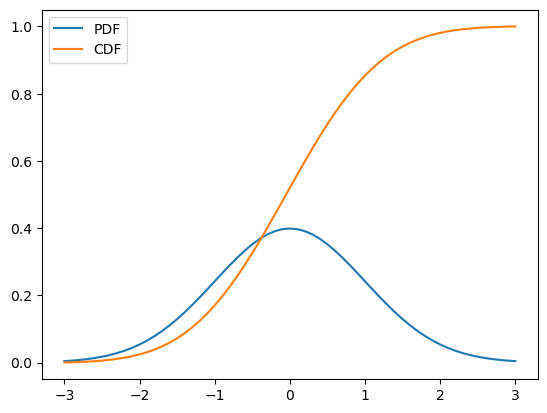

In [7]:
avg = 0 
stdev = 1

x = collect(-3:0.1:3)

pdf = gaussian.(stdev, avg, x)
cdf = cumsum(pdf)
cdf = cdf ./ maximum(cdf) #normalize
plot(x, pdf, label = "PDF")
plot(x, cdf, label = "CDF")
legend()
savefig("pdfvcdf.png")

# Distibutions Statistic Example
We have two datasets: the average daily temperature in July for Tampa Bay, Fort Myers, and St Petersburg. Let's think about the following questions
- Based on physics/climatology, what do we expect about these two datasets? 
- What are the general statistics of this dataset? 
- How are they similar/how are they different? imshow(imread("/home/brynn/Pictures/florida.png"))

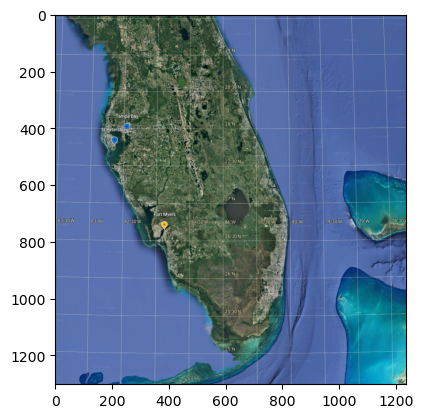

PyObject <matplotlib.image.AxesImage object at 0x7f6accd00fd0>

In [8]:
imshow(imread("/home/brynn/Pictures/florida2.png"))

## Analyzing Each Distribution Independently

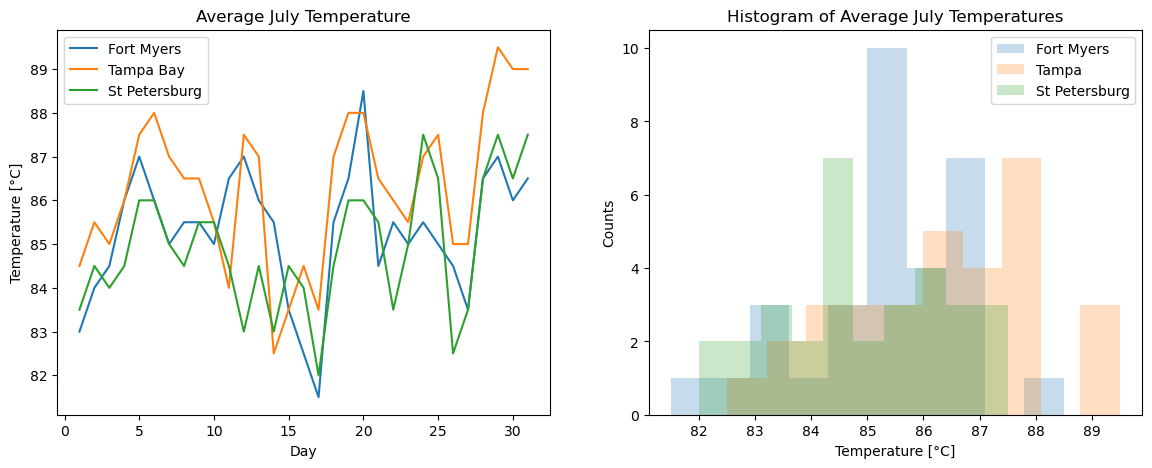

In [9]:
#Fort Meyers, FL avg temp for July
#https://www.weather.gov/wrh/Climate?wfo=tbw
fm_at = [83,84,84.5,86,87,86,85,85.5,85.5,85,86.5,87,86,85.5,83.5,82.5,81.5,85.5,86.5,88.5,84.5,85.5,85,85.5,85,84.5,83.5,86.5,87,86,86.5]
#Tampa area avg temp for July
t_at = [84.5,85.5,85,86,87.5,88,87,86.5,86.5,85.5,84,87.5,87,82.5,83.5,84.5,83.5,87,88,88,86.5,86,85.5,87,87.5,85,85,88,89.5,89,89]
#St Petersburg
sp_at = [83.5,84.5,84,84.5,86,86,85,84.5,85.5,85.5,84.5,83,84.5,83,84.5,84,82,84.5,86,86,85.5,83.5,85,87.5,86.5,82.5,83.5,86.5,87.5,86.5,87.5]

#make a plot 
days = collect(1:31)
figure(figsize = (14, 5))
subplot(1,2,1)
plot(days, fm_at, label = "Fort Myers")
plot(days, t_at, label = "Tampa Bay")
plot(days, sp_at, label = "St Petersburg")
title("Average July Temperature")
xlabel("Day")
ylabel("Temperature [°C]")
legend()
subplot(1,2,2)
hist(fm_at, label = "Fort Myers", alpha = 0.25)
hist(t_at, label = "Tampa", alpha = 0.25)
hist(sp_at, label = "St Petersburg", alpha = 0.25)
xlabel("Temperature [°C]")
ylabel("Counts")
legend()
title("Histogram of Average July Temperatures")
savefig("distex.png")

In [10]:
#define our own functions to calculate all our relevant statistics
mean(x) = sum(x)/length(x)
variance(x) = sum([(xᵢ - mean(x))^2/(length(x)-1) for xᵢ in x])
std(x) = sqrt(variance(x))
function median(x)
    sorted_x = sort(x)
    if length(x) % 2 == 0
        return sorted_x[convert(Int, length(x)/2)]
    else
        return mean([sorted_x[convert(Int, floor(length(x)/2))], sorted_x[convert(Int, ceil(length(x)/2))]])
    end
end

function mode(x)
    unique_x = unique(x) 
    counts = [findall(xᵢ-> xᵢ == f, x) for f in unique_x]
    i = findall(x->x == maximum(length.(counts)), length.(counts))[1]
        return unique_x[i]
end
range(x) = maximum(x) - minimum(x) 
get_statistics(x) = [mean(x), variance(x), std(x), median(x), mode(x), range(x), skewness(x), kurtosis(x)]
skewness(x) = mean([((xᵢ - mean(x))/(std(x)))^3 for xᵢ in x])
kurtosis(x) = mean([((xᵢ - mean(x))/(std(x)))^4 for xᵢ in x])

kurtosis (generic function with 1 method)

In [11]:
#make a nice data frame containing all our statistics 
using DataFrames
df = DataFrame(mean = Float32[], 
    variance = Float32[], 
    std = Float32[], 
    median = Float32[], 
    mode = Float32[], 
    range = Float32[], 
    skewness = Float32[], 
    kurtosis = Float32[])

push!(df, get_statistics(fm_at))
push!(df, get_statistics(t_at))
push!(df, get_statistics(sp_at))

,mean,variance,std,median,mode,range,skewness,kurtosis
,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32
1,85.2903,2.1629,1.47068,85.5,85.5,7.0,-0.474329,3.17473
2,86.3064,3.06129,1.74965,86.5,88.0,7.0,-0.205969,2.21274
3,84.9355,2.12903,1.45912,84.5,84.5,5.5,0.0220187,2.172


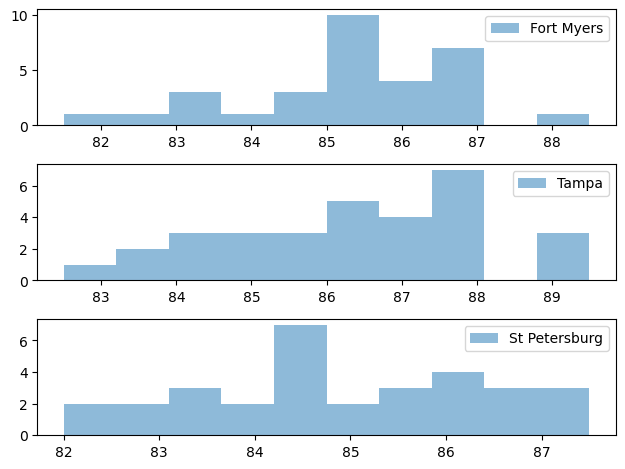

In [12]:
#plot our histograms one more time so we can look at our stats and histograms together
subplot(3,1,1)
hist(fm_at, label = "Fort Myers", alpha = 0.5)
legend()
subplot(3,1,2)
hist(t_at, label = "Tampa", alpha = 0.5)
legend()
subplot(3,1,3)
hist(sp_at, label = "St Petersburg", alpha = 0.5)
legend()
tight_layout()

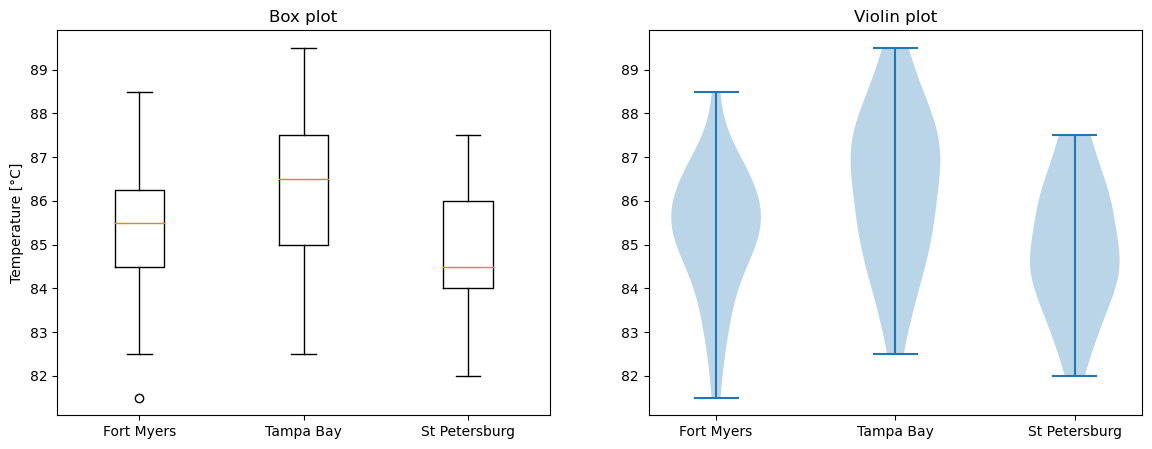

PyObject Text(0.5, 1.0, 'Violin plot')

In [13]:
#Two different ways to visualize dists
figure(figsize = (14, 5))
subplot(1,2,1)
boxplot((fm_at, t_at, sp_at), labels = ["Fort Myers", "Tampa Bay", "St Petersburg"])
title("Box plot")
ylabel("Temperature [°C]")
subplot(1,2,2)
gca().violinplot((fm_at, t_at, sp_at))
gca().set_xticks(1:3, ["Fort Myers", "Tampa Bay", "St Petersburg"])
title("Violin plot")

## Analyzing Distributions Together
Note: this calculation will compare variations at the **same time**. Our histogram does not preserve order, so if we repeated this calculation for a random variable with an identical distribution, we would most likely get a lower correlation, because they will not be related in time.

In [14]:
covariance(x,y) = mean([(x[i] - mean(x)) * (y[i] - mean(y)) for i ∈ 1:length(x)])
correlation(x,y) = covariance(x,y) /(std(x)*std(y))

correlation (generic function with 1 method)

In [15]:
function show_covcorr(x,y)
    @show covariance(x,y)
    @show correlation(x,y)
end

println("Fort Meyers/Tampa")
show_covcorr(fm_at, t_at)
println("Tampa/St Petersburg")
show_covcorr(t_at, sp_at)
println("St Petersburg/Fort Meyers")
show_covcorr(sp_at, fm_at)

Fort Meyers/Tampa
covariance(x, y) = 1.693288241415192
correlation(x, y) = 0.6580518116124129
Tampa/St Petersburg
covariance(x, y) = 1.8826742976066602
correlation(x, y) = 0.7374486984878579
St Petersburg/Fort Meyers
covariance(x, y) = 1.1477627471383973
correlation(x, y) = 0.5348628815473954


0.5348628815473954

In [16]:
#to demonstrate: now these are frog weights! exact same distributions 
greenfrog = shuffle(fm_at)
bluefrog = shuffle(t_at)
purplefrog = shuffle(sp_at)

println("Green Frog/Blue Frog")
show_covcorr(greenfrog, bluefrog)
println("Blue Frog/Purple Frog")
show_covcorr(bluefrog, purplefrog)
println("Purple Frog/Green Frog")
show_covcorr(purplefrog, greenfrog)

Green Frog/Blue Frog
covariance(x, y) = 0.36264308012486957
correlation(x, y) = 0.14093166775045365
Blue Frog/Purple Frog
covariance(x, y) = 0.3262226847034343
correlation(x, y) = 0.12778232249603075
Purple Frog/Green Frog
covariance(x, y) = 0.24453694068678447
correlation(x, y) = 0.11395537367510232


0.11395537367510232

## Interpretation
Before reading this section, I would really encourage you to think critically about the dataset, examine the plots, and look at the statistics and come up with your own interpretation. Interpretation is somewhat an art, and you will definitely come up with different responses than me. That's okay, and expected! As long as you have good reasoning for your interpretation, it's probably fine. 

Comparing means, medians, and modes: Tampa Bay has the highest mean temperature and St Petersburg has the lowest mean. We get the same result comparing the medians and modes

Comparing variance: Tampa Bay has the largest variances (as well as IQR and standard deviation) and St Petersburg and Fort Myers have comparable variances, standard deviations, and IQRs

Skewness: Both Fort Myers and Tampa Bay have negative, right-leaning skew (skewed toward higher values). In comparison, St. Petersburg has very little skew (near-zero).

Kurtosis: Fort Myers has high kurtosis, meaning it has a higher tailedness (more extreme values) than St Petersburg and Tampa

Covariance: Tampa Bay and St Petersburg have higher covariance than the other two combinations, meaning that these regions are probably the most related. 

A general interpretation of these results, taking into account physics and our results: Tampa Bay experiences the highest mean temperatures in this time period, but also the most variability, possibly due to the urban heat island effect. The more coastal cities of St Petersburg and Fort Myers have similar mean temperatures and variability. However, Fort Myers has more negative skewness values and higher kurtosis values than the other two cities, possibly indicating that it has a different temperature distribution more biased towards extreme values. Tampa Bay and St Petersburg have the highest covariances, most likely due to their close geographical nature. 

Notes about my analysis: this is just the first step of good data analysis - now we have some hypotheses we could expand on with more statistics. Next we could look at our confidence in these claims (are they just statistical noise or are they real results?). Note how careful my language is - there's a lot of "possibly" and the admission that these findings are specific to this dataset. It would take a lot more work to say anything conclusive about the climate of Florida! 

Good data analysis should confirm some of the things you thought (which ours does!), and open up some new avenues for research (which ours does!) 

## Subsection: Central Limit Theorem
Let's demonstrate that a really weird distribution like the gamma distribution still has some "normal" behavior

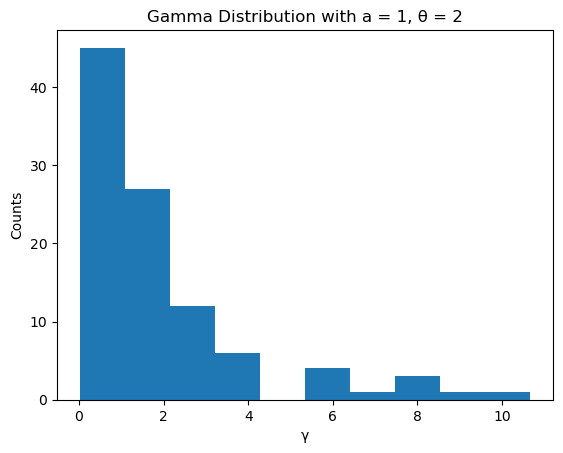

In [17]:
using Distributions
#plot the gamma distribution
xᵢ(i) = rand(Gamma(1,2),i)
hist(xᵢ(100))
title("Gamma Distribution with a = 1, θ = 2")
xlabel("γ")
ylabel("Counts")
savefig("gamma.png")

Now let's demonstrate the law of large numbers by showing that as we take increasingly larger samples of our distribution, our mean converges

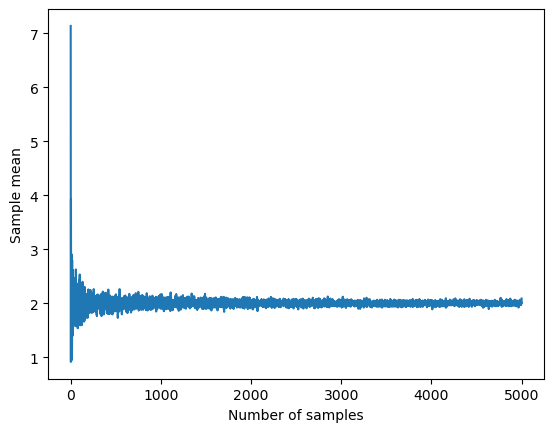

In [18]:
#law of large numbers - the sample averages converge almost surely
array_length = collect(1:5000)
plot(array_length, [mean(xᵢ(a)) for a in array_length])
xlabel("Number of samples") 
ylabel("Sample mean") 
savefig("lawoflarge.png")

Let's define our population mean as the mean at some very large number of samples. Then we'll define a function that takes the mean of some number of samples, subtracts off the population mean, and then multiplies by the square rooot of the  number of samples we took. 

In [19]:
μ = mean(xᵢ(100000))
fluctuations(n) = sqrt(n) * (mean(xᵢ(n)) - μ)

fluctuations (generic function with 1 method)

And now we'll plot this for increasing numbers of samples, showing that we approach a normal distribution 

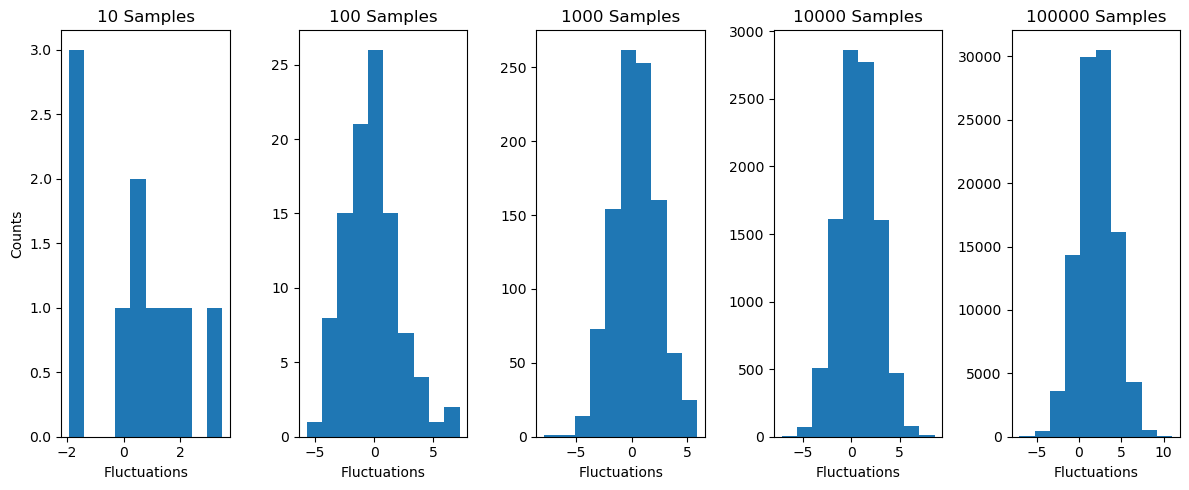

In [20]:
n_array = 10 .^ collect(1:5)
figure(figsize = (12,5))
for (i,n) in enumerate(n_array) 
    subplot(1,5,i) 
    hist(fluctuations.(1:n))
    title(string(n) * " Samples")
    if i == 1
        ylabel("Counts")
    end
    xlabel("Fluctuations")
end
tight_layout()
savefig("clt.png")


## Hypothesis Testing 
Null hypothesis: average temperature in Tampa Bay in June is equal to 85 degrees

Alternative hypothesis: average temperature in Tampa Bay in June is greater than 85 degrees 

Test: upper-tailed t-test

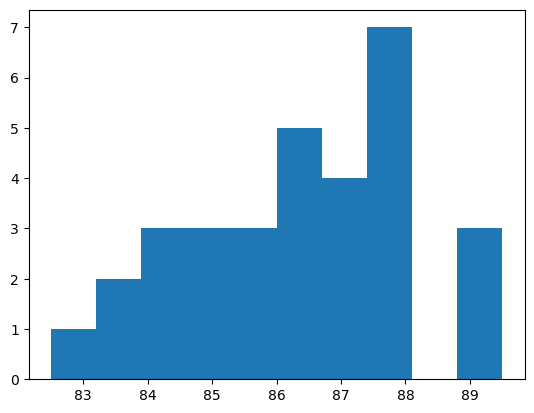

([1.0, 2.0, 3.0, 3.0, 3.0, 5.0, 4.0, 7.0, 0.0, 3.0], [82.5, 83.2, 83.9, 84.6, 85.3, 86.0, 86.7, 87.4, 88.1, 88.8, 89.5], (PyObject <matplotlib.patches.Rectangle object at 0x7f6acccb6f70>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acccb68e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca57730>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca579a0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca57100>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca570d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca575e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca57700>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acca57ee0>, PyObject <matplotlib.patches.Rectangle object at 0x7f6acccbdd60>))

In [21]:
hist(t_at)

In [22]:
ttest = (mean(t_at) - 85) / (std(t_at)/sqrt(length(t_at)))

4.157401007859076

In a one-tailed test, we want to integrate from that value on the Student's t-distribution (similar to a normal distribution, with some scaling for the degrees of freedom) to the extrema. Because the distribution is symmetric, this is equivalent to taking the cdf between 0 and 1-t

In [23]:
Distributions.cdf.(TDist(length(t_at)-1), -ttest)

0.00012366667038752124

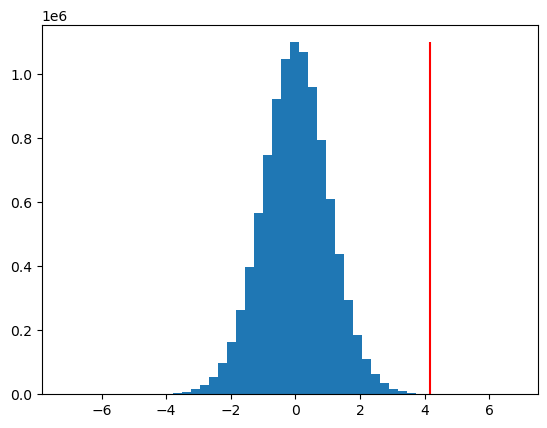

PyObject <matplotlib.collections.LineCollection object at 0x7f6aed335d00>

In [24]:
normal = rand(TDist(length(t_at)-1), 10000000)
h = hist(normal, bins = 50)
vlines(x = ttest, ymin = 0, ymax = maximum(h[1]), color = "red")

If we use a p-value of 0.05 (a common practice in many fields) as our significance level (equivalent to significant at 95% level), then we can **reject the null hypothesis** because p < 0.05

Many programming langauges have packages to do this from easily, like HypothesisTests.jl

In [25]:
using HypothesisTests
pvalue(OneSampleTTest(t_at, 85), tail=:right)

0.00012366667038752124

In [26]:
OneSampleTTest(t_at, 85)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         85
    point estimate:          86.3065
    95% confidence interval: (85.66, 86.95)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0002

Details:
    number of observations:   31
    t-statistic:              4.157401007859076
    degrees of freedom:       30
    empirical standard error: 0.3142471968505176


## Linear least squares

In [27]:
x = collect(1:length(t_at))
y = t_at

E = hcat(ones(length(t_at)), x)
@time x̃ = inv(E'*E)*E'*y

  0.883536 seconds (3.64 M allocations: 184.626 MiB, 13.31% gc time, 99.94% compilation time)


2-element Vector{Float64}:
 85.19354838709677
  0.06955645161290391

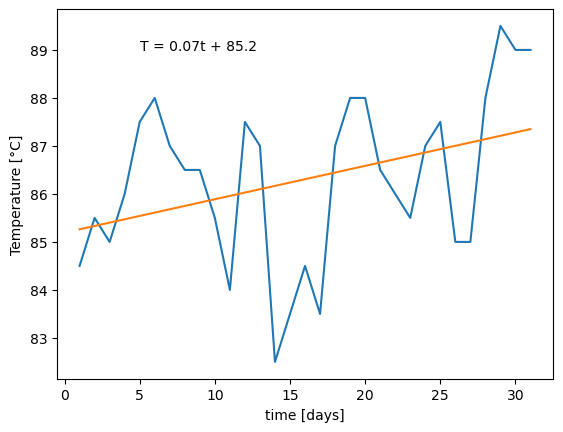

In [28]:
plot(x,y)
plot(x, x̃[1] .+ x̃[2].*x)
xlabel("time [days]")
ylabel("Temperature [°C]")
text(x = 5, y = 89, s = "T = 0.07t + 85.2")
savefig("regression.png") 

It's simple to calculate the error in our slope too. Imagine we have an uncertainty of 0.1 degrees C on every measurement

In [29]:
using LinearAlgebra
Cnn = diagm(0.1*ones(length(x))) #make noise covariance matrix 
estimator = inv(E'*E)*E' #this is just the c calculation, with no y
Cxx = estimator * Cnn * estimator'
m_err = sqrt(Cxx[2,2]) #diagonals of Cxx are variances of c 

0.006350006350009525